# Data-Driven Research Assignment 2: Topic Modeling
This notebook contains the second, collaborative, graded assignment of the 2023 Data-Driven Research course. In this assignment you'll use a topic modeling tool in order to uncover the ''topics'' of a large set of reviews of popular films. 

To complete the assignment, complete **Part 1, Part 2, Part 3 and Part 4** of the **Your Model** section at the end.

This is a collaborative assignment. In the text cell below, please include all the names of your group members.

If you used code or a solution from the internet (such as StackOverflow) or another external resource, please make reference to it (in any format). Unattributed copied code will be considered plagiarism and therefore fraud.


Authors of this answer: George 13842013, Raluca; 13936395, Laura 13982540, Lili 13816314, Daria 13755013

# 1. Introduction

You'll use a Topic Modelling tool from Gensim, a popular library for topic modelling in Python, though these days mainly known for its implementation of Word2Vec to train word embeddings (dense representations). Using this library, you will model topics based on reviews of popular films. The reviews are stored in plain text files, organized by film and rating. The aim of this exercise is to familiarize you with the topic modeling process and its output and to get insight in what kinds of topics are modeled.

# 2. Preparation

This assignment comes with the following files:


1.   The reviews of the films. This is the data in which we want to find topics. They are found in the movie2k/txt_sentoken directory. There are then two types: negative reviews (neg directory) and positive reviews (pos directory). The reviews are already tokenized.
2.   Stopword list files. They are found in the stopwords directory.

Let's start by loading the movie reviews from the files (I'll do it for you):

In [2]:
import os

def load_reviews(folder_path):
    reviews = [] #Make a list to put the reviews in
    reviewnames = [] # Make a list to put the review filenames in (to be able to look them up later)
    tokens = 0 #Make a counter for the number of tokens
    
    for file in os.listdir(folder_path):
        #Loop through all the text files in the folder, each containing one review
        
        if not file.endswith('.txt'):  #Only read text files
            continue

        file_path = os.path.join(folder_path, file)

        #Open the text file and read its contents
        with open(file_path, encoding='utf-8') as infile:
            review = infile.read()
        reviewnames.append(file)
            
        # Turn the string with the review into a list of words (this is easy because it is already tokenized)
        review = review.split()
        # And add it to the list
        reviews.append(review)
        # To count the number of tokens processed so far
        tokens = tokens + len(review)

    print(f"Loaded reviews from {folder_path} containing {tokens} tokens in total.") 
    return reviews, reviewnames
        
folder_path = "movie2k/txt_sentoken"
    
movie_reviews_pos, movie_reviewnames_pos = load_reviews(folder_path + "/pos") #Load the positive reviews
movie_reviews_neg, movie_reviewnames_neg = load_reviews(folder_path + "/neg") #Load the negative reviews

movie_reviews = movie_reviews_pos + movie_reviews_neg #Combine the lists of positive and negative reviews into one
movie_reviewnames = movie_reviewnames_pos + movie_reviewnames_neg #The same for the list of filenames

Loaded reviews from movie2k/txt_sentoken/pos containing 787051 tokens in total.
Loaded reviews from movie2k/txt_sentoken/neg containing 705630 tokens in total.


If you are working on Google Colab, you will probably have to change the path to the files to something that Google Colab has access to. For example, you could put the files on your Google Drive and then load them from there, as we did in Coding the Humanities. For more details about how to work with files in Python and load them from Google Drive, have a look at the Coding the Humanities course notebook on Files: https://github.com/bloemj/2023-coding-the-humanities/blob/main/notebooks/4_ReadingAndWritingFiles.ipynb

How to load files off Google Drive is explained at the beginning there.

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

## Preprocessing

Now that we have loaded the text, you might want to perform some pre-processing steps to be able to create a better bag-of-words model in which all forms of a word are mapped to a single number. For example, you could remove the punctuation characters, or you could perform lemmatization or stemming, which we discussed in the lecture. This would be the place to do it by writing a preprocessing function that accepts a list of movie reviews as its argument and returns a preprocessed list of movie reviews. Feel free to use your knowledge of text normalization from Coding the Humanities or the functions you wrote then. Here is some information on how to perform stemming with NLTK: https://www.nltk.org/howto/stem.html

You can also try other forms of preprocessing, if you are able to do it.

Make sure to also keep the unmodified reviews, so you can compare the results with preprocessing and without preprocessing.

**Part 1: Preprocessing**

You can also skip this part for now - it is not required to perform the topic modelling, but you will get better results.

In [5]:
#Code that fixes macOS nltk ssl errors
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
import string


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [6]:
#Import the necessary libraries
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
#Defining the preprocessing function
def preprocess_reviews(reviews):    #define the preprocessing function that takes a list of reviews as argument
    '''This function takes a list of reviews as argument and returns a list of unprocessed and preprocessed reviews
    Input: list of reviews
    Output: list of unprocessed and preprocessed reviews'''

    #initialize 2 empty lists 
    processed_reviews = [] #for processed reviews
    unprocessed_reviews = [] #for unprocessedreviews

    #load sets of NLTK stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)

    #initialize NLTK lemmatizer and stemmer
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    #loop through each review in the list
    for review in reviews:
        #turn the list of words back into a string
        review_str = ' '.join(review)
        
        #perform text tokenization on the string
        words = word_tokenize(review_str)

        #list comprehension that performs multiple tasks
        #converts each word to lowercase
        #using if statement, check if a word is in the 'stopwords' or 'punctuation' set and filters them out
        words = [word.lower() for word in words if word.lower() not in stop_words and word.lower() not in punctuation]
        #Remove apostrophes
        words = [word.replace("'", "") for word in words]
        #Remove quotation marks
        words = [word.replace('"', '') for word in words]
        #Remove empty strings
        words = [word for word in words if word != '']
        #perform lematization and stemming on each word
        words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words]

        #add the processed review to the list
        processed_reviews.append(words)

        #add the unprocessed review to the list
        unprocessed_reviews.append(review_str)

    return processed_reviews, unprocessed_reviews


[nltk_data] Downloading package wordnet to /Users/george/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
#Call the preprocessing function
processed_reviews, unprocessed_reviews = preprocess_reviews(movie_reviews)
print(processed_reviews[:2])  # Print the first two processed reviews
print(unprocessed_reviews[:2])  # Print the first two unprocessed reviews

[['assum', 'noth', 'phrase', 'perhap', 'one', 'use', '1990', 's', 'first', 'impress', 'rumor', 'hardli', 'ever', 'seem', 'phrase', 'especi', 'goe', 'oscar', 'novak', 'architect', 'main', 'focu', 'three', 'tango', 'delight', 'funni', 'romant', 'comedi', 'assumpt', 'novak', 'matthew', 'perri', 'shi', 'clumsi', 'chicago', 'base', 'architect', 'along', 'openli', 'gay', 'partner', 'peter', 'steinberg', 'oliv', 'platt', 'fight', 'project', 'day', 'day', 'one', 'job', 'restor', 'popular', 'build', 'charl', 'newman', 'dylan', 'mcdermott', 'rich', 'well-known', 'businessman', 'charl', 'immedi', 'take', 'like', 'oscar', 'enjoy', 'person', 'sen', 'humor', 'see', 'oscar', 'someon', 'could', 'trust', 'charl', 'ask', 'watch', 'girlfriend', 'unpredict', 'adventur', 'girl', 'name', 'ami', 'post', 'neve', 'campbel', 'make', 'live', 'blow', 'glass', 'charl', 'want', 'know', 'talk', 'goe', 'point', 'make', 'sure', 's', 'see', 'someon', 'el', 'cours', 'oscar', 'gladli', 'take', 'job', 'meet', 'ami', 'art'

# 3. Topic Modelling using Gensim

Gensim offers an implementation of Latent Dirichlet Allocation (LDA), the most popular topic modelling algorithm, which we discussed in the lecture. If you are working on Google Colab, it is normally already installed there. Otherwise, you can install it with `pip install --upgrade gensim` or if you are using Conda, `conda install -c conda-forge gensim`.

Let's load it, and some other things we use:

In [8]:
#Import the necessary libraries
import gensim
import gensim.corpora as corpora
import gensim.models as models
import itertools
from operator import itemgetter
print(gensim.__version__)

4.3.1


## Constructing the bag-of-words model

The `gensim.corpora.Dictionary()` class allows you to map words to numbers, which is what we need to make a bag-of-words model. In particular, the doc2bow() function converts a collection of words to a bag-of-words representation:

In [9]:
#Create a bag-of-words model for the unprocessed reviews
movie_dictionary = corpora.Dictionary(movie_reviews)
movie_bow_corpus = [movie_dictionary.doc2bow(d) for d in movie_reviews]

Let's see what happened:

In [10]:
print('Number of unique tokens in the dataset:', len(movie_dictionary))

#Checking the first 11 words in the bag-of-words model
print('\nThe first 11 words in the bag-of-words model:')
print(dict(itertools.islice(movie_dictionary.token2id.items(), 12)))

#Checking the first 100 words of the first review
print('\nThe start of the first review:')
print(movie_reviews[0][:100])
#And the filename of that review is...
print('\nThe filename of the first review:')
print(movie_reviewnames[0])

#Which words are used in that review?
print('\nMost frequent words in the first review:')
for i, freq in sorted(movie_bow_corpus[0], key=itemgetter(1), reverse=True)[:20]:
    print(movie_dictionary[i], "-->", freq)
print("...")

Number of unique tokens in the dataset: 50920

The first 11 words in the bag-of-words model:
{'"': 0, '&': 1, '(': 2, ')': 3, ',': 4, '.': 5, '1': 6, "1990's": 7, "1997's": 8, "1998's": 9, '1999': 10, '2': 11}

The start of the first review:
['assume', 'nothing', '.', 'the', 'phrase', 'is', 'perhaps', 'one', 'of', 'the', 'most', 'used', 'of', 'the', "1990's", ',', 'as', 'first', 'impressions', 'and', 'rumors', 'are', 'hardly', 'ever', 'what', 'they', 'seem', 'to', 'be', '.', 'the', 'phrase', 'especially', 'goes', 'for', 'oscar', 'novak', ',', 'an', 'architect', 'who', 'is', 'the', 'main', 'focus', 'of', 'three', 'to', 'tango', ',', 'a', 'delightful', ',', 'funny', 'romantic', 'comedy', 'about', 'assumptions', 'and', 'being', 'yourself', '.', 'novak', '(', 'matthew', 'perry', ')', ',', 'a', 'shy', ',', 'clumsy', ',', 'chicago', 'based', 'architect', ',', 'along', 'with', 'openly', 'gay', 'partner', ',', 'peter', 'steinberg', '(', 'oliver', 'platt', ')', ',', 'fights', 'for', 'projects',

## The topic model

Now, we can train our LDA model on this bag-of-words data by using `gensim.models.ldamodel.LDAModel()`.

This model can take various parameters that specify what kind of model gets made. Some important ones:


* num_topics: how many topics do we want? In what follows, we set the number of topics to 5, because we want to have a few topics that we can interpret, but the number of topics is data and application-dependent;
* id2word: our bag-of-words dictionary needed to map ids to strings;
* passes: how often we iterate over the entire corpus (default = 1). In general, the more passes, the higher the accuracy. This number is also called epochs in Artificial Intelligence and Machine Learning.

Let's first make a model that finds 5 topics, and tries 25 times to improve its estimate. This code may take a while to run, as it is the process that creates the topic model. If it takes too long, you can reduce the number of passes, but the topics might be worse.

In [11]:
#Creating the LDA model for the unprocessed reviews with 5 topics and 25 passes
reviews_ldamodel = models.ldamodel.LdaModel(movie_bow_corpus, num_topics=5, id2word = movie_dictionary, passes=25)

And let's have a look! An easy way to inspect the created topics is by using the `show_topics()` method, which prints the most representative word for each topic along with their probability.

In [12]:
reviews_ldamodel.show_topics(num_words=8) #Show the top 8 words for each topic

[(0,
  '0.051*"," + 0.049*"the" + 0.040*"." + 0.026*"a" + 0.024*"of" + 0.024*"and" + 0.019*"to" + 0.016*"in"'),
 (1,
  '0.045*"." + 0.041*"," + 0.031*"the" + 0.020*"to" + 0.018*"a" + 0.017*"and" + 0.012*"is" + 0.012*"of"'),
 (2,
  '0.058*"," + 0.047*"the" + 0.036*"." + 0.021*"and" + 0.021*"a" + 0.020*"of" + 0.016*"to" + 0.012*"("'),
 (3,
  '0.057*"," + 0.041*"." + 0.039*"the" + 0.028*"a" + 0.025*"and" + 0.021*"to" + 0.019*"of" + 0.018*"is"'),
 (4,
  '0.057*"the" + 0.048*"," + 0.046*"." + 0.024*"a" + 0.024*"of" + 0.023*"and" + 0.022*"to" + 0.018*"is"')]

There we go, we have a topic model. However, you can probably see that it is far from perfect and some uninteresting 'words' appear there. Now, it is your turn to make it better!

## Your model

**Part 1: Preprocessing**

Show the effect of your preprocessing by also making a topic model for your preprocessed_movie_reviews. First, you make a bag-of-words model and then the LdaModel, as above. Feel free to go back to your preprocessing code above and update it based on what you saw from the show_topics function applied to the initial model.

Try to make a model with 8 topics, and show the top 8 words for each topic. **Assign the model to a new variable with a sensible name** (avoid overwriting the previous models).

Also for the dictionary and corpus, **give the variables different and expressive names to avoid overwriting the other ones**. Otherwise, you will get confused between your different topic models.

In [13]:
#Import the necessary libraries
import gensim
import gensim.corpora as corpora
import gensim.models as models
import itertools
from operator import itemgetter
print(gensim.__version__)

4.3.1


In [14]:
#Redefining the function so it only returns the processed reviews
def preprocess_reviews(reviews): #define the preprocessing function that takes a list of reviews as argument
   '''This function takes a list of reviews as input and returns a list of processed reviews
   Input: list of reviews
   Output: list of processed reviews'''
    #initialize 2 empty lists
    processed_reviews = [] #for processed reviews
    unprocessed_reviews = [] #for unprocessedreviews

    #load sets of NLTK stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)

    #initialize NLTK lemmatizer and stemmer
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    #loop through each review in the list
    for review in reviews:
        #turn the list of words back into a string
        review_str = ' '.join(review)

        #perform text tokenization on the string
        words = word_tokenize(review_str)

        #list comprehension that performs multiple tasks
        #converts each word to lowercase
        #using if statement, check if a word is in the 'stopwords' or 'punctuation' set and filters them out
        words = [word.lower() for word in words if word.lower() not in stop_words and word.lower() not in punctuation]
        #Remove apostrophes
        words = [word.replace("'", "") for word in words]
        # #Remove quotation marks
        # words = [word.replace('"', '') for word in words]
        #Remove double dashes
        words = [word.replace('--', '') for word in words]
        #Remove empty strings
        words = [word for word in words if word != '']
        #perform lematization and stemming on each word
        #words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words]

        #add the processed review to the list
        processed_reviews.append(words)

        #add the unprocessed review to the list
        unprocessed_reviews.append(review_str)

    return processed_reviews

In [15]:
#Making a dictionary and a bag-of-words model for the preprocessed reviews
processed_reviews = preprocess_reviews(movie_reviews)
print(type(processed_reviews))
processed_dictionary = corpora.Dictionary(processed_reviews)
processed_bow_corpus = [processed_dictionary.doc2bow(d) for d in processed_reviews]

<class 'list'>


In [16]:
#Making a topic model for the preprocessed reviews with 8 topics and 25 passes
processed_reviews_ldamodel = models.ldamodel.LdaModel(processed_bow_corpus, num_topics=8, id2word = processed_dictionary, passes=25)

In [17]:
#Show the top 8 words for each topic
processed_reviews_ldamodel.show_topics(num_words=8)

[(0,
  '0.006*"s" + 0.004*"besson" + 0.002*"matilda" + 0.002*"egoyan" + 0.002*"film" + 0.002*"vampire" + 0.002*"life" + 0.002*"lola"'),
 (1,
  '0.022*"s" + 0.019*"``" + 0.016*"film" + 0.009*"one" + 0.007*"nt" + 0.005*"movie" + 0.004*"like" + 0.003*"story"'),
 (2,
  '0.006*"s" + 0.004*"54" + 0.003*"film" + 0.003*"movie" + 0.002*"ghost" + 0.002*"``" + 0.002*"carry" + 0.002*"dog"'),
 (3,
  '0.028*"s" + 0.010*"film" + 0.007*"movie" + 0.006*"one" + 0.006*"nt" + 0.006*"``" + 0.004*"like" + 0.003*"character"'),
 (4,
  '0.023*"s" + 0.015*"film" + 0.013*"``" + 0.008*"nt" + 0.007*"one" + 0.006*"movie" + 0.005*"like" + 0.004*"good"'),
 (5,
  '0.030*"``" + 0.026*"s" + 0.010*"film" + 0.008*"nt" + 0.007*"movie" + 0.006*"one" + 0.005*"like" + 0.003*"would"'),
 (6,
  '0.004*"vampire" + 0.003*"blade" + 0.003*"horizon" + 0.002*"event" + 0.002*"mickey" + 0.002*"vampires" + 0.002*"mallory" + 0.002*"erin"'),
 (7,
  '0.035*"``" + 0.023*"s" + 0.011*"nt" + 0.011*"movie" + 0.010*"film" + 0.008*"one" + 0.005*"l

**Part 2: Stopwords**

The topics you saw so far are probably mostly made up of stopwords such as "the". As discussed in the lecture, our results will probably be more interesting if we get rid of them.

We have included 3 generic lists of stopwords: the default list of the tool Mallet, a shorter frequent word list used in search applications (Snowball stemmer), and the top 10,000 words based on Google n-grams (in frequency order, select as many lines as you want). Gensim and NLTK also have stopword lists.

Make a function that accepts the path to a stopwords file (e.g. `stopwords/standard-mallet-en.txt`), and returns a list of stopwords.

In [18]:
def load_stopwords(filename):
    '''Loads a list of stopwords from a file.
    Input: filename: the path to the file
        Output: stopword_list: a list of stopwords'''
    stopword_list = []
    with open(filename, 'r') as f:
        for line in f:
            stopword_list.append(line.strip())
    return stopword_list

stopword_list = load_stopwords("stopwords/google-n-top10000.txt")

Then, make a function that takes a stopword list and a list of reviews (e.g. `preprocessed_movie_reviews`). The function should remove all stopwords from all the reviews, returning a list of the reviews without stopwords. This code may be a bit slow if you have many stopwords, since there is a lot of data to process.

In [19]:
#Loading the stopwords
stopword_list = load_stopwords("stopwords/google-n-top10000.txt")
def filter_stopwords(stopword_list, movie_reviews):
    '''Filters out stopwords from a list of reviews.
    Input:
        stopword_list: a list of stopwords
        movie_reviews: a list of reviews, each review is a list of words
    Output:
        filtered_movie_reviews: a list of reviews, each review is a list of words
    '''
    filtered_movie_reviews = []
    
    for review in movie_reviews:
        filtered_review = []
        for word in review:
            if word not in stopword_list:
                filtered_review.append(word)
        filtered_movie_reviews.append(filtered_review)
    return filtered_movie_reviews
#Calling the function
filtered_movie_reviews = filter_stopwords(stopword_list, processed_reviews)

Lastly, let's make another topic model with this filtered data! Again, you make a bag-of-words model and then the LdaModel, as above.

Try to make a model with 8 topics, and show the top 8 words for each topic. Assign the model to a new variable with a sensible name (avoid overwriting the previous models).

In [20]:
#Making a dictionary and a bag-of-words model for the filtered reviews
filtered_dictionary = corpora.Dictionary(filtered_movie_reviews)
filtered_bow_corpus = [filtered_dictionary.doc2bow(d) for d in filtered_movie_reviews]

In [21]:
#Making a topic model for the filtered reviews
filtered_reviews_ldamodel = models.ldamodel.LdaModel(filtered_bow_corpus, num_topics=8, id2word = filtered_dictionary, passes=25)

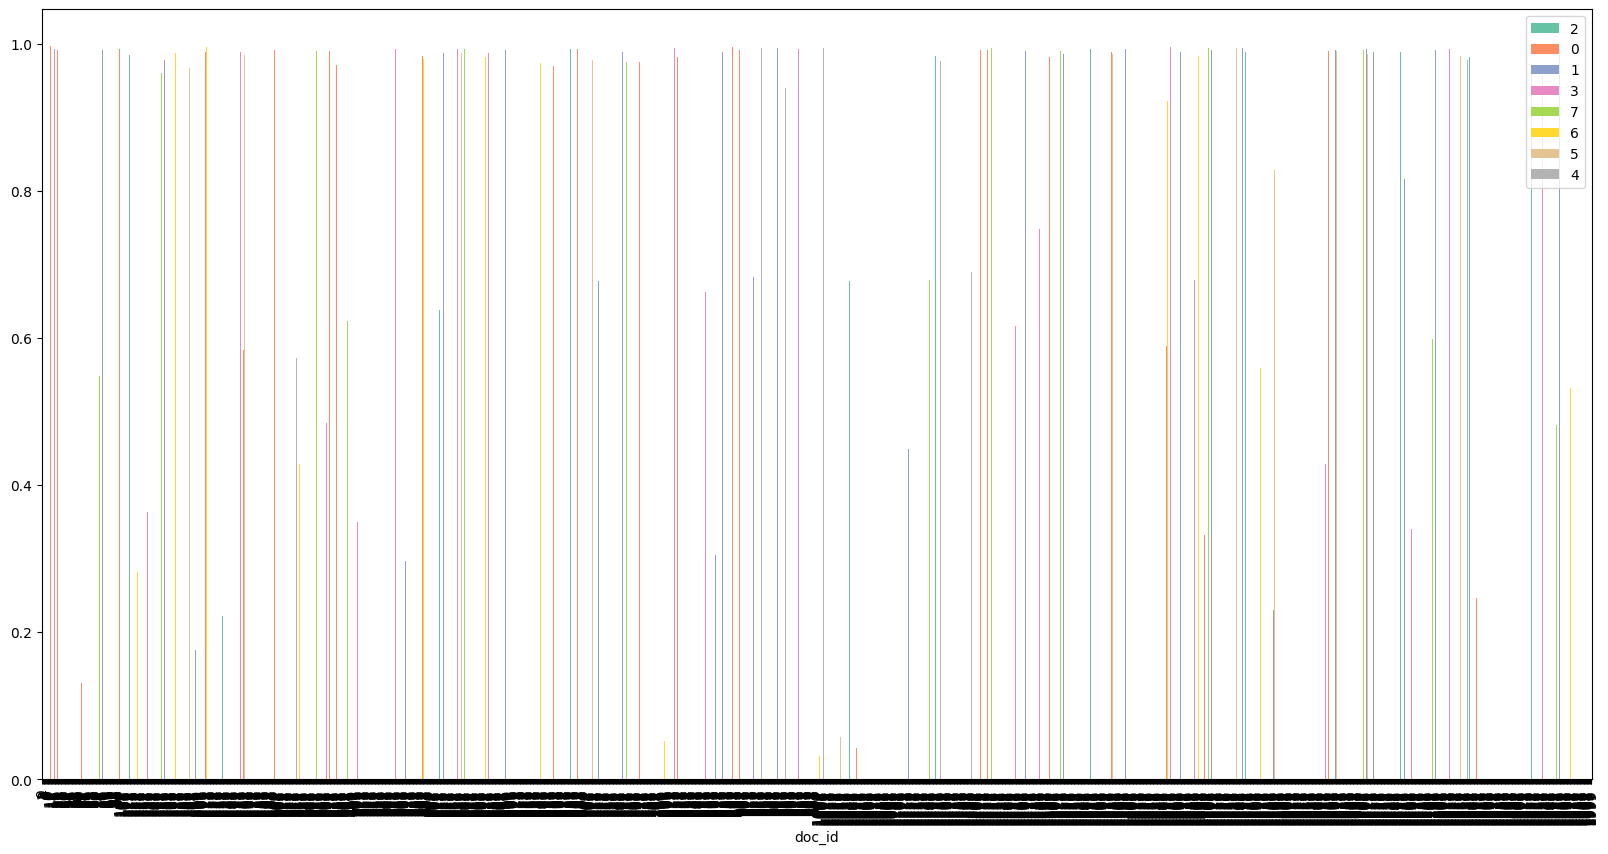

[(0,
  '0.127*"``" + 0.003*"scream" + 0.003*"2" + 0.002*"3" + 0.002*"screenplay" + '
  '0.002*"woody" + 0.001*"suspense" + 0.001*"flick" + 0.001*"wo" + '
  '0.001*"sequel"'),
 (1,
  '0.112*"``" + 0.001*"nbsp" + 0.001*"apes" + 0.001*"filmmakers" + 0.001*"1" + '
  '0.001*"aliens" + 0.001*"tarantino" + 0.001*"wo" + 0.001*"screenplay" + '
  '0.001*"mulan"'),
 (2,
  '0.026*"``" + 0.005*"tarzan" + 0.003*"sandler" + 0.002*"2" + 0.002*"54" + '
  '0.002*"laughs" + 0.002*"boogie" + 0.002*"cauldron" + 0.001*"hedwig" + '
  '0.001*"wcw"'),
 (3,
  '0.080*"``" + 0.005*"truman" + 0.003*"carrey" + 0.003*"titanic" + '
  '0.002*"flynt" + 0.002*"spawn" + 0.002*"lebowski" + 0.001*"2" + '
  '0.001*"aliens" + 0.001*"screenplay"'),
 (4,
  '0.002*"nello" + 0.002*"lola" + 0.002*"``" + 0.002*"laughs" + 0.002*"sid" + '
  '0.002*"mob" + 0.001*"lynch" + 0.001*"stephane" + 0.001*"dune" + '
  '0.001*"manages"'),
 (5,
  '0.031*"``" + 0.006*"godzilla" + 0.002*"armageddon" + 0.002*"fugitive" + '
  '0.002*"libby" + 0.002

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import LdaModel
from pprint import pprint

# Get the topic distribution for each document in the corpus
doc_topic_dist = []
for i in range(len(filtered_bow_corpus)):
    doc_topic_dist.append(dict(filtered_reviews_ldamodel.get_document_topics(filtered_bow_corpus[i])))

# Create a Pandas dataframe with the topic distribution probabilities for each document
df = pd.DataFrame(doc_topic_dist)

# Add the document IDs to the dataframe
df['doc_id'] = range(len(filtered_bow_corpus))

# Set the document IDs as the index of the dataframe
df.set_index('doc_id', inplace=True)

# Plot the distribution of topics in the corpus
df.plot(kind='bar', stacked=False, figsize=(20,10), colormap='Set2')
plt.show()

# PrettyPrint the topics using the print_topics() method
pprint(filtered_reviews_ldamodel.print_topics(num_topics=8, num_words=10))

**Part 3: Experimentation**

Are these general stopword lists sufficient? We are working in the movie review domain, meaning that we may have other uninformative stopwords than in the general domain, such as the word 'movie'. Some key experimentation is to add specific stopwords for the movie review domain, which would occur frequently in all (or most) of the clusters. Note that removing words will not just hide these words, but lead to (even very) different topics and different top ranked reviews.

**Make your own domain-specific stopwords file** by taking one of the existing ones and adding your own stopwords (make sure that the stopword file is saved as a plain text file). Think about what stopwords are in this domain (e.g., the word film is not a stopword in general, but it will occur in essentially every film review).

Re-use the functions you previously made to load your own stopwords file and filter the movie reviews. Then, make another topic model with your new filtering and show the top 8 words for each topic.

In [23]:
#Loading the stopwords that we made and filtering the reviews
my_stopword_list = load_stopwords("stopwords/stopwords-empty.txt")
domainfiltered_movie_reviews = filter_stopwords(my_stopword_list, processed_reviews)

In [24]:
#Making a dictionary and a bag-of-words model for the domain filtered reviews
domainfiltered_dictionary = corpora.Dictionary(domainfiltered_movie_reviews)
domainfiltered_bow_corpus = [domainfiltered_dictionary.doc2bow(d) for d in domainfiltered_movie_reviews]

In [25]:
#Making a topic model for the domain filtered reviews
domainfiltered_reviews_ldamodel = models.ldamodel.LdaModel(domainfiltered_bow_corpus, num_topics=8, id2word = domainfiltered_dictionary, passes=25)

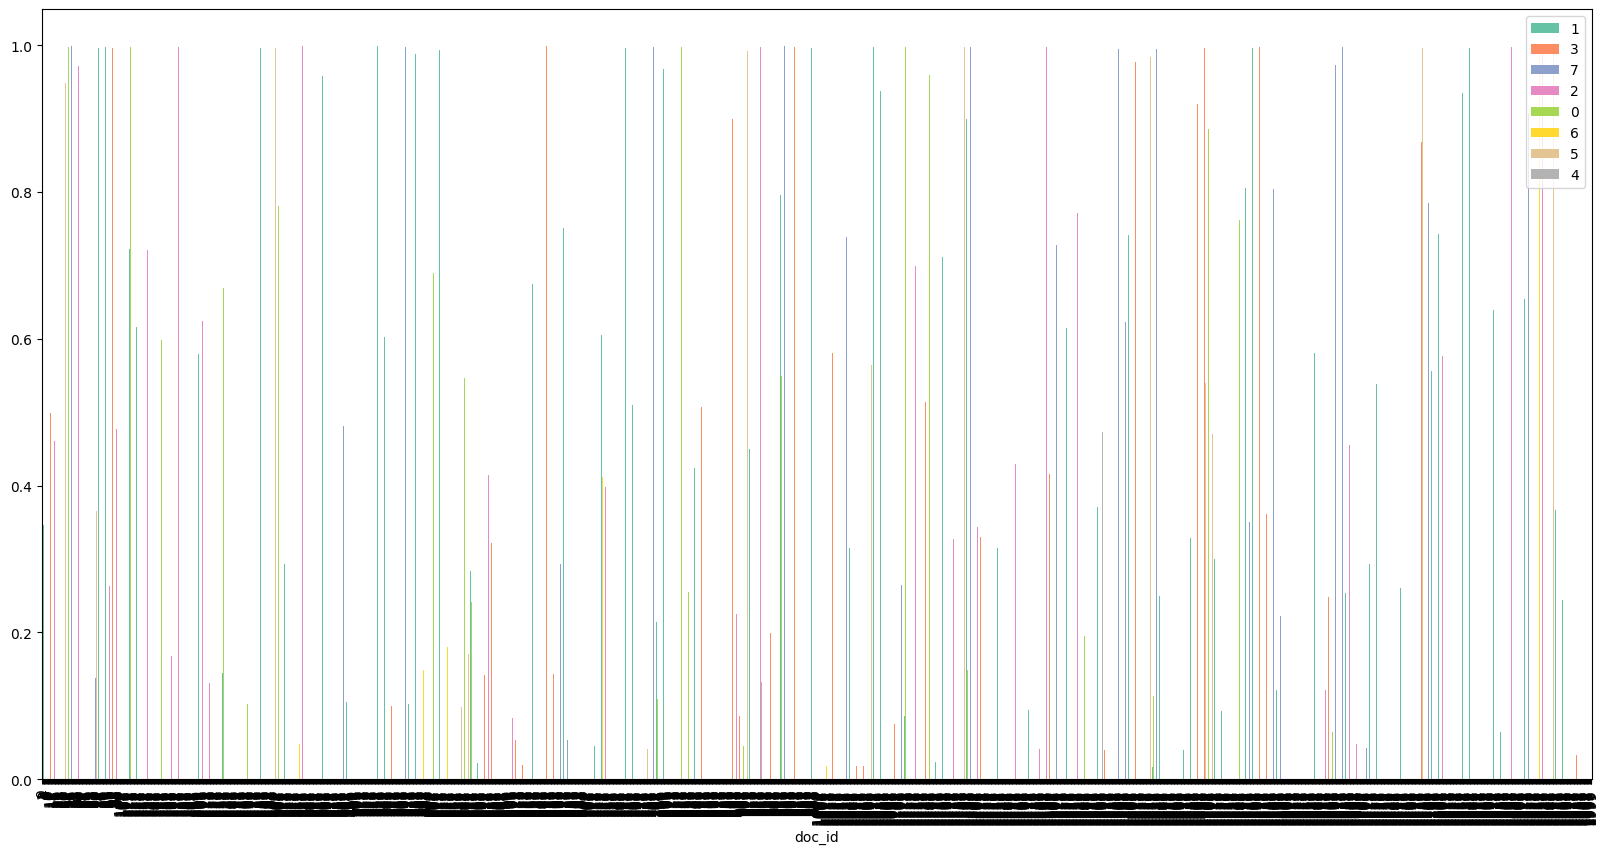

[(0,
  '0.023*"s" + 0.015*"``" + 0.007*"one" + 0.006*"nt" + 0.004*"like" + '
  '0.004*"life" + 0.003*"story" + 0.003*"also" + 0.003*"good" + 0.003*"even"'),
 (1,
  '0.027*"s" + 0.021*"``" + 0.010*"nt" + 0.008*"one" + 0.005*"like" + '
  '0.004*"would" + 0.004*"time" + 0.004*"even" + 0.003*"story" + '
  '0.003*"character"'),
 (2,
  '0.021*"s" + 0.015*"``" + 0.007*"one" + 0.007*"nt" + 0.005*"like" + '
  '0.003*"good" + 0.003*"even" + 0.003*"two" + 0.003*"first" + 0.003*"also"'),
 (3,
  '0.054*"``" + 0.024*"s" + 0.009*"nt" + 0.007*"one" + 0.005*"like" + '
  '0.004*"even" + 0.003*"good" + 0.003*"time" + 0.003*"character" + '
  '0.003*"story"'),
 (4,
  '0.005*"s" + 0.003*"bulworth" + 0.002*"beatty" + 0.002*"derek" + '
  '0.002*"vampire" + 0.002*"one" + 0.002*"bubby" + 0.001*"beavis" + '
  '0.001*"gal" + 0.001*"vampires"'),
 (5,
  '0.018*"s" + 0.008*"one" + 0.007*"``" + 0.006*"nt" + 0.004*"like" + '
  '0.004*"good" + 0.003*"story" + 0.003*"action" + 0.003*"character" + '
  '0.003*"would"'),
 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import LdaModel
from pprint import pprint
# Get the topic distribution for each document in the corpus
doc_topic_dist = []
for i in range(len(domainfiltered_bow_corpus)):
    doc_topic_dist.append(dict(domainfiltered_reviews_ldamodel.get_document_topics(domainfiltered_bow_corpus[i])))
# Create a Pandas dataframe with the topic distribution probabilities for each document
df = pd.DataFrame(doc_topic_dist)
# Add the document IDs to the dataframe
df['doc_id'] = range(len(domainfiltered_bow_corpus))
# Set the document IDs as the index of the dataframe
df.set_index('doc_id', inplace=True)
# Plot the distribution of topics in the corpus
df.plot(kind='bar', stacked=False, figsize=(20,10), colormap='Set2')
plt.show()
# Print the topics using the print_topics() method
pprint(domainfiltered_reviews_ldamodel.print_topics(num_topics=8, num_words=10))

Now, you should have 3 models (or more): one without any stopword filtering, one with the standard stopword filtering and one with the domain-filtered stopwords using the list you modified yourself. Compare the topics found by the three models (just looking at them is fine, no need to code a comparison).

Do the topics look better with stopword filtering and with domain-specific stopword filtering? At this point, do the resulting topics correspond to particular film genres you have expected?

### After trying multiple stopwords sets for filtering we came to the conclusion that the topics are the most coherent and clear when using   the Google nGram stopword list. The motivation for the effectiveness of this process is that in our case the Google nGram stopword list is the best at identifying the stopwords that we do not need in our analysis. Regarding the results , the topics do not correspond to particular film genres, but they rather give a general idea of what the main theme of the movie is or rather reflect in the results reviews of their viewers.


Increase the number of topics. What happens with the topics if you model very few or very many topics? (answer in a text box). Assign the model(s) to a new variable with a sensible name (avoid overwriting the previous models).

In [27]:
# Making a model with 12 topics for the filtered reviews
filtered_reviews_ldamodel12 = models.ldamodel.LdaModel(filtered_bow_corpus, num_topics=12, id2word = filtered_dictionary, passes=25)

In [28]:
# Print the topics using the print_topics() method
pprint(filtered_reviews_ldamodel12.print_topics(num_topics=12, num_words=10))

[(0,
  '0.010*"spawn" + 0.003*"jedi" + 0.003*"sid" + 0.002*"``" + 0.002*"flynt" + '
  '0.002*"garofalo" + 0.002*"geronimo" + 0.002*"hawtrey" + 0.002*"simmons" + '
  '0.002*"vader"'),
 (1,
  '0.072*"``" + 0.002*"bats" + 0.002*"stallone" + 0.002*"hanks" + '
  '0.002*"screenplay" + 0.002*"gloria" + 0.001*"mickey" + 0.001*"enjoyable" + '
  '0.001*"egoyan" + 0.001*"premise"'),
 (2,
  '0.028*"``" + 0.006*"titanic" + 0.002*"scorsese" + 0.002*"winslet" + '
  '0.002*"1" + 0.002*"besson" + 0.002*"guido" + 0.002*"enjoyable" + '
  '0.002*"benigni" + 0.002*"spielberg"'),
 (3,
  '0.062*"``" + 0.008*"scream" + 0.006*"2" + 0.005*"tarzan" + 0.003*"3" + '
  '0.002*"sidney" + 0.002*"melvin" + 0.002*"screenplay" + 0.002*"sequel" + '
  '0.002*"woody"'),
 (4,
  '0.134*"``" + 0.002*"travolta" + 0.002*"seagal" + 0.002*"aliens" + 0.002*"1" '
  '+ 0.002*"2" + 0.002*"screenplay" + 0.001*"manages" + 0.001*"mulan" + '
  '0.001*"filmmakers"'),
 (5,
  '0.040*"``" + 0.009*"truman" + 0.004*"carrey" + 0.002*"cauldron" 

#### After trying multiple stopword lists and other parameters, we came to the following conclusions regarding how the results change;  If one is  increasing or decreasing the topics numbers.
* Firstly, if we increase the number of topics the model will automatically try to find very diverse themes in the overall corpus, being able to focus and uncover more precise topics.
* Regardless, if the topic number is TOO high it might affect the process since the model might create too specific and very particular topics leading to complex results.
#### On the other hand, if we decrease the number of topics the model  will try to find more general themes in the overall corpus, being able to group together more themes; However, if the topic number is TOO low the model might not be able to efficiently categorise them potentially excluding very important patterns or details.
#### Our conclusions also after testing the code in the following exercise was that the ideal number of topics and words depends of every particular case  and in our situations the ratio of 12 topics and 10 words was the most efficient one.


In [29]:
# Making a model with 2 topics for the filtered reviews
filtered_reviews_ldamodel2 = models.ldamodel.LdaModel(filtered_bow_corpus, num_topics=2, id2word = filtered_dictionary, passes=25)

In [35]:
# Print the topics using the print_topics() method
pprint(filtered_reviews_ldamodel2.print_topics(num_topics=2, num_words=10))

[(0,
  '0.036*"``" + 0.002*"truman" + 0.001*"screenplay" + 0.001*"2" + '
  '0.001*"manages" + 0.001*"laughs" + 0.001*"hilarious" + 0.001*"wo" + '
  '0.001*"premise" + 0.001*"surprisingly"'),
 (1,
  '0.104*"``" + 0.002*"2" + 0.002*"scream" + 0.001*"aliens" + 0.001*"wo" + '
  '0.001*"screenplay" + 0.001*"sequel" + 0.001*"3" + 0.001*"1" + '
  '0.001*"manages"')]


Increase the number of topic words printed to get more information per topic.  Is it easier to make sense of a topic if you look further down the list, or are the initial words more clear?

In [30]:
# Print the topics using the print_topics() method with 20 words
pprint(filtered_reviews_ldamodel.print_topics(num_topics=12, num_words=20))

[(0,
  '0.127*"``" + 0.003*"scream" + 0.003*"2" + 0.002*"3" + 0.002*"screenplay" + '
  '0.002*"woody" + 0.001*"suspense" + 0.001*"flick" + 0.001*"wo" + '
  '0.001*"sequel" + 0.001*"menace" + 0.001*"jedi" + 0.001*"hanks" + 0.001*"1" '
  '+ 0.001*"clever" + 0.001*"villain" + 0.001*"premise" + 0.001*"shrek" + '
  '0.001*"1999" + 0.001*"willis"'),
 (1,
  '0.112*"``" + 0.001*"nbsp" + 0.001*"apes" + 0.001*"filmmakers" + 0.001*"1" + '
  '0.001*"aliens" + 0.001*"tarantino" + 0.001*"wo" + 0.001*"screenplay" + '
  '0.001*"mulan" + 0.001*"manages" + 0.001*"villain" + 0.001*"laughs" + '
  '0.001*"pulp" + 0.001*"2" + 0.001*"enjoyable" + 0.001*"ordell" + '
  '0.001*"hilarious" + 0.001*"flick" + 0.001*"jolie"'),
 (2,
  '0.026*"``" + 0.005*"tarzan" + 0.003*"sandler" + 0.002*"2" + 0.002*"54" + '
  '0.002*"laughs" + 0.002*"boogie" + 0.002*"cauldron" + 0.001*"hedwig" + '
  '0.001*"wcw" + 0.001*"manages" + 0.001*"bulworth" + 0.001*"hilarious" + '
  '0.001*"jakob" + 0.001*"apes" + 0.001*"ape" + 0.001*"tara

### If we were to think about the general situation, increasing the number of topics  would usually mean we would get more specific information on each topic. Concomitantly, this process could also lead to the model including words that may be not relevant to the topic.
### Considering this, and taking into account the results for our specific model we would argue that the initial words of each topic are providing relevant clear and personalized description of the general theme. In contrast , looking at the lower-ranked they could be an indication for more context and detail. To make things more clear, if we take the example of Topic 0, the first words: "scream" and  "sidney" could suggest a review related to the movie "Scream". Looking more into further detail, words like "williamson', "sequel" or "craven" reinforce the idea that indeed the topic is making reference to the "Scream" series.
### Lastly, going back to the initial question, there is no absolute answer to establish  whether it is easier to make sense of a topic by looking further down the list or if the initial words are more clear.

If you are interested, you can also experiment with the difference between positive and negative reviews.

### Part 4: Evaluation

There are a few numbers we can compute that indicate the quality of a topic model, such as [perplexity and coherence](https://github.com/ccs-amsterdam/r-course-material/blob/master/tutorials/R_text_LDA_perplexity.md). For perplexity, a lower number means a better model, and for coherence, a higher number is better. Try computing these scores for your models, and see which is the best one according to the numbers

In a real project, you should compute these numbers over a separate part of the dataset (the test set) for a proper evaluation, but for simplicity and because we have not talked about this in the lecture we will skip that here.

In [37]:
from gensim.models import CoherenceModel

#Compute perplexity for the basic model on the bag-of-words representation of the reviews:
print('Perplexity: ', reviews_ldamodel.log_perplexity(movie_bow_corpus))  

# Compute coherence score on the same:
coherence_model_lda = CoherenceModel(model=reviews_ldamodel, texts=movie_reviews, dictionary=movie_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence score: ', coherence_lda)

Perplexity:  -7.015672631914624
Coherence score:  0.3354387302769207


In [39]:
#Computing the perplexity and coherence score for the filtered model
print('Perplexity: ', filtered_reviews_ldamodel.log_perplexity(filtered_bow_corpus))
coherence_model_lda = CoherenceModel(model=filtered_reviews_ldamodel, texts=filtered_movie_reviews, dictionary=filtered_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence score: ', coherence_lda)

Perplexity:  -9.42501192063905
Coherence score:  0.4470925217378461


### As you can see this model has the best 'numbers'

In [42]:
#Computing the perplexity and coherence score for the domain filtered model
print('Perplexity: ', domainfiltered_reviews_ldamodel.log_perplexity(domainfiltered_bow_corpus))
coherence_model_lda = CoherenceModel(model=domainfiltered_reviews_ldamodel, texts=domainfiltered_movie_reviews, dictionary=domainfiltered_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence score: ', coherence_lda)

Perplexity:  -8.78961775745196
Coherence score:  0.259173824807445


However, just comparing numbers is not very interpretable. We will choose our topic model with the highest coherence score and validate the evaluation.

Using the top 20 topic words for each topic in the model with the highest coherence score, pick at least 5 topic numbers and determine what film genres (in an informal sense) they represent, i.e. think of a meaningful label for the topic. Write down the topic number and your topic label. Is it easy to guess what the topic represents? For how many topics are you fairly confident, for how many do you have to make a guess, and for how many do you have no real clue.

In [19]:
reviews_ldamodel.get_term_topics("the", minimum_probability = 1e-3)

[(0, 0.055921294), (1, 0.03749197), (3, 0.04851789)]

Do this for your own best model and the labels you just picked. For each of your topic labels, if the probability for the label is the highest for the topic number you wrote down, your guess was probably correct. Did you guess a suitable label for every topic?

In [57]:
#replace the word "the" with the label
filtered_reviews_ldamodel.get_term_topics("villain", minimum_probability = 1e-3)

[(0, 0.0010752442), (6, 0.0011487443)]

The model is not able to identify the genre of the review, but it is able to identify the word "villain" as a topic. This is because the word "villain" is a word in the reviews, so it is very likely to be assigned to a topic.

In [59]:
#replace the word "the" with the label
filtered_reviews_ldamodel.get_term_topics("horror", minimum_probability = 1e-3)

IndexError: list index out of range

In a real project, you would also want to validate your topics by examining the reviews that are most strongly associated with that topic. You can see what documents have what topics using the get_document_topics() method. Here we look at the topics for the first document in the model (change the name of the model to yours):

In [20]:
reviews_ldamodel.get_document_topics(movie_bow_corpus[0], minimum_probability = 0)

[(0, 0.5992486),
 (1, 0.40010813),
 (2, 0.00021273903),
 (3, 0.00021792643),
 (4, 0.0002126372)]

Or for the first 20 of them:

In [21]:
for i, doc_topics in enumerate(reviews_ldamodel.get_document_topics(movie_bow_corpus)):
    if i >= 20:
        break
    print(f"Topics for the review {movie_reviewnames[i]}: {doc_topics}")

Topics for the review cv839_21467.txt: [(0, 0.5985771), (1, 0.40077963)]
Topics for the review cv034_29647.txt: [(0, 0.18439762), (1, 0.40318063), (3, 0.41190264)]
Topics for the review cv908_16009.txt: [(0, 0.9667906), (1, 0.030888526)]
Topics for the review cv748_12786.txt: [(0, 0.31601787), (3, 0.682003)]
Topics for the review cv253_10077.txt: [(0, 0.49870333), (1, 0.23407167), (3, 0.26602477)]
Topics for the review cv147_21193.txt: [(0, 0.3862265), (1, 0.33833292), (3, 0.27503145)]
Topics for the review cv962_9803.txt: [(0, 0.9985889)]
Topics for the review cv686_13900.txt: [(0, 0.5576557), (1, 0.032713193), (3, 0.40825292)]
Topics for the review cv410_24266.txt: [(0, 0.12192893), (1, 0.031952072), (3, 0.8457637)]
Topics for the review cv913_29252.txt: [(0, 0.39579576), (1, 0.2547448), (3, 0.34902528)]
Topics for the review cv695_21108.txt: [(0, 0.102962166), (1, 0.010149761), (3, 0.8863889)]
Topics for the review cv601_23453.txt: [(0, 0.9511697), (1, 0.048518524)]
Topics for the r

But this assignment is already long enough so I will not ask you to report on this too!


Thank You :)
